In [13]:
import cv2
import numpy as np
import os
from skimage import morphology

In [14]:
# Load image in grayscale (replace with your image file)
image = cv2.imread('biomedical_image.png', cv2.IMREAD_GRAYSCALE)

# Pre-processing: Apply Gaussian filter
gauss = cv2.GaussianBlur(image, (5, 5), sigmaX=0)

# Segmentation: Use Otsu's thresholding
_, binary = cv2.threshold(gauss, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Morphological cleanup
binary_bool = binary > 0
binary_cleaned = morphology.remove_small_objects(binary_bool, min_size=50)
binary_cleaned = (binary_cleaned * 255).astype(np.uint8)

# Feature extraction: Find contours
contours, _ = cv2.findContours(binary_cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Detection: Draw contours
output = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for cnt in contours:
    cv2.drawContours(output, [cnt], -1, (0, 255, 0), 2)

# Save results
cv2.imwrite('output_detected.png', output)

# Display images based on environment
def show_image(title, img):
    if 'COLAB_GPU' in os.environ:  # Google Colab
        from google.colab.patches import cv2_imshow
        cv2_imshow(img)
    else:  # Local or Jupyter Notebook
        cv2.imshow(title, img)

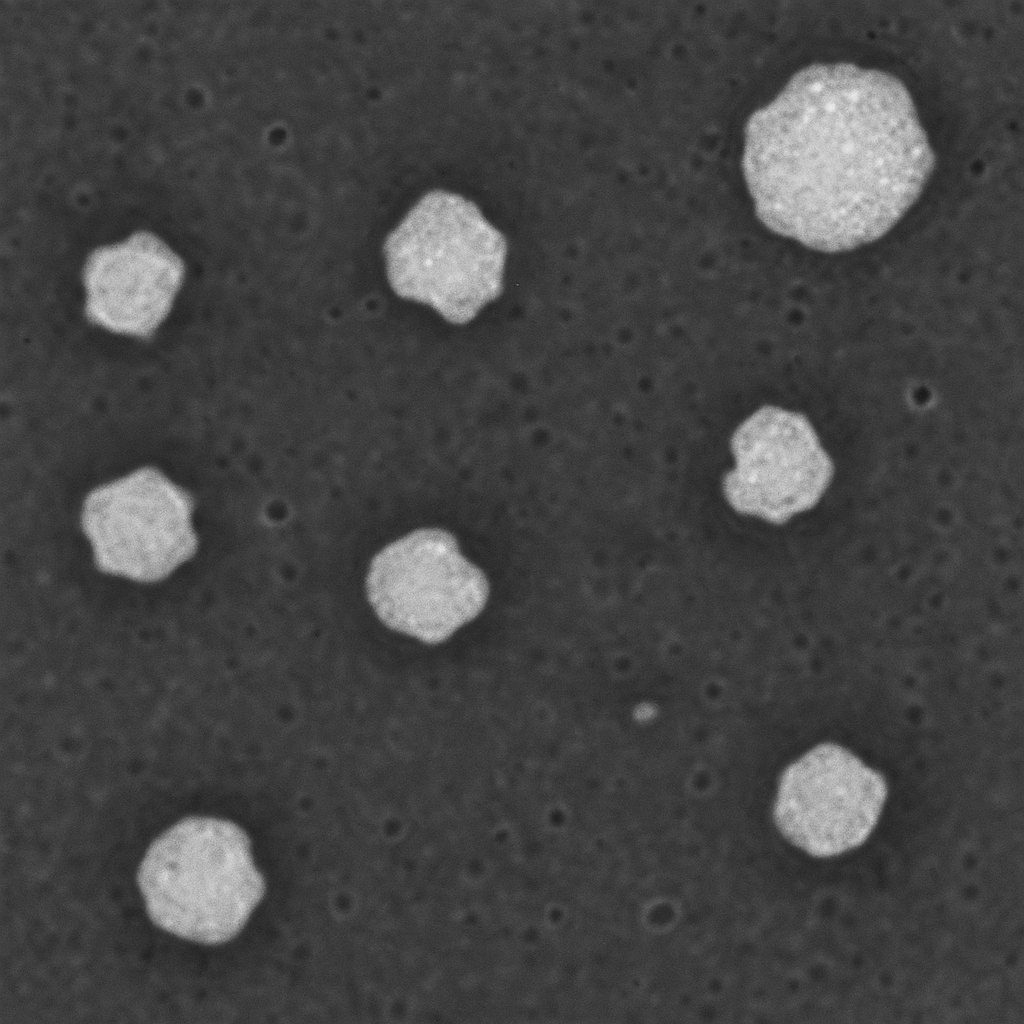

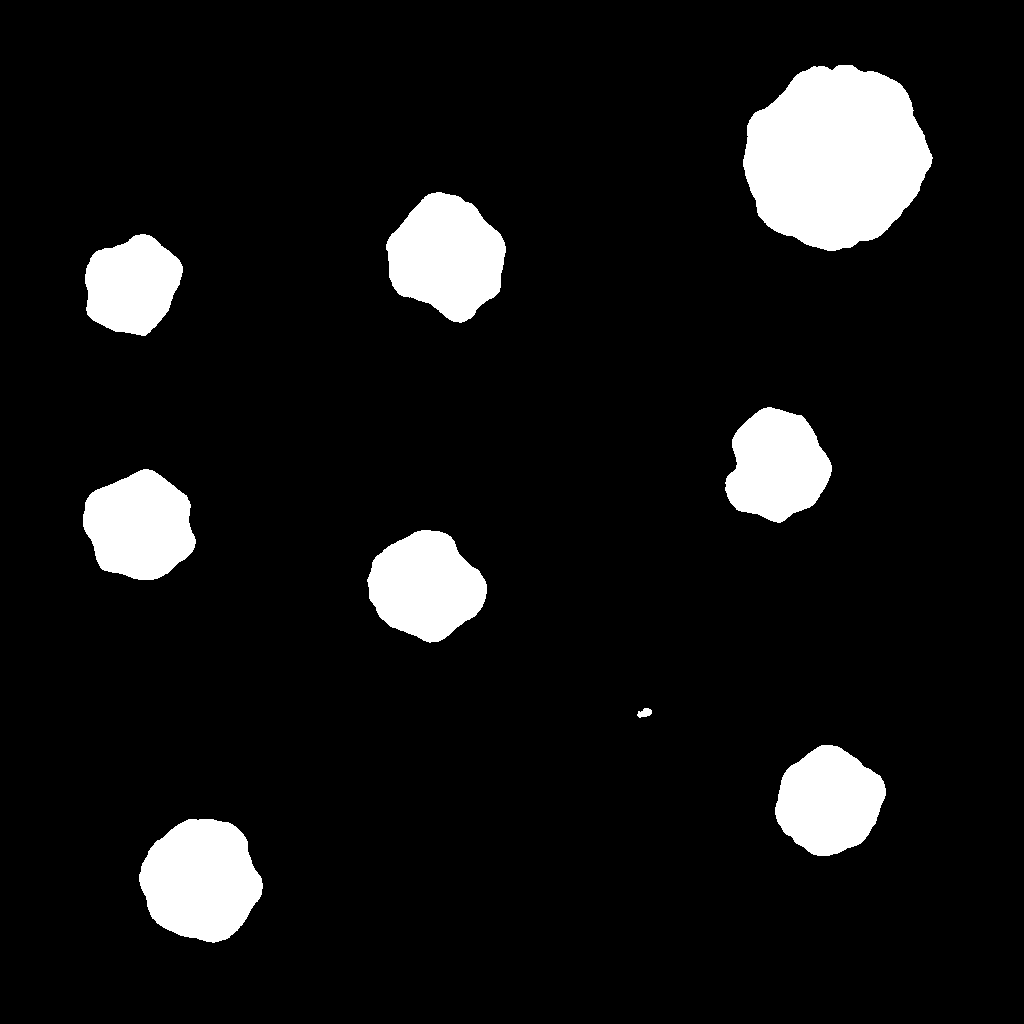

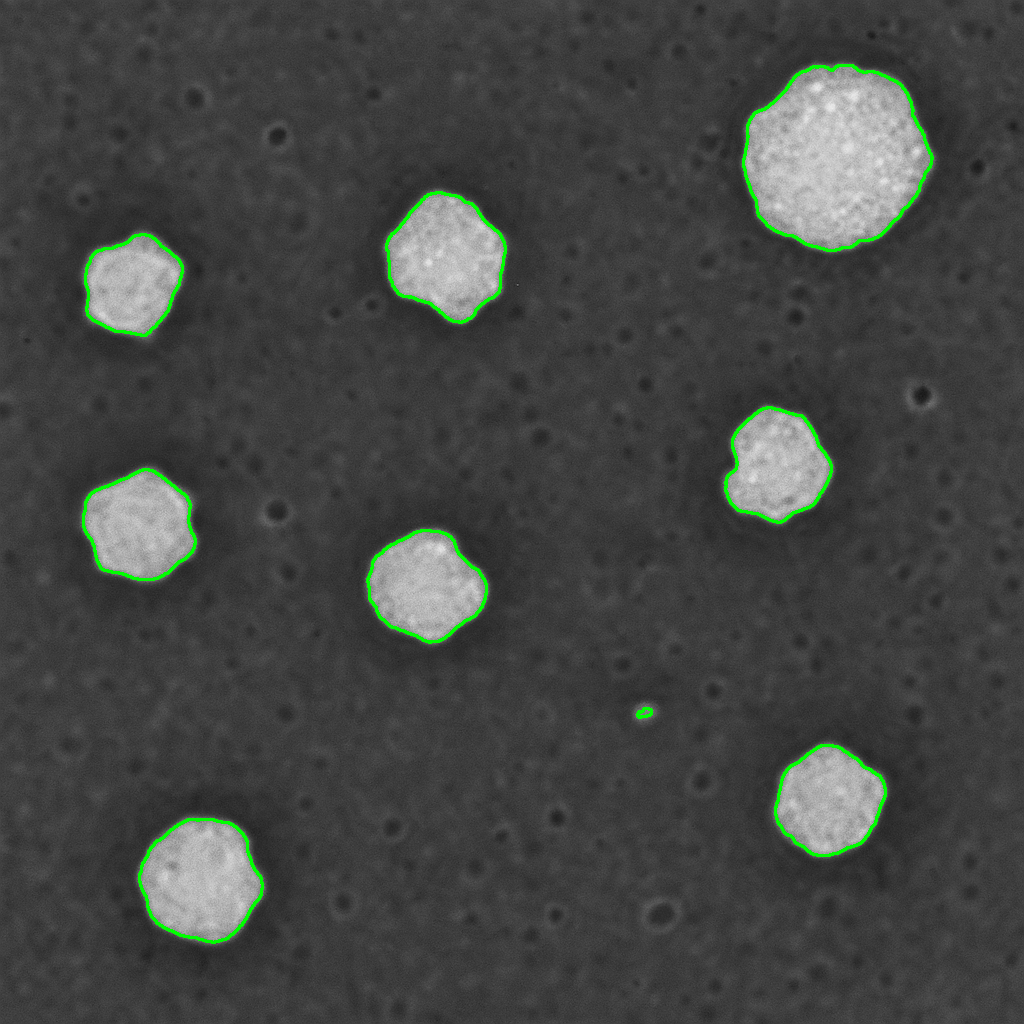

In [15]:
# Show images
show_image('Original', image)
show_image('Segmented', binary_cleaned)
show_image('Detection', output)